In [3]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql

%matplotlib inline

In [4]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
SP500_data = ql.get('CFTC/138741_FO_L_ALL')
SP500_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,141335.0,23381.0,8845.0,12478.0,93497.0,31868.0,129356.0,53191.0,11979.0,88144.0
2020-06-30,28625.0,440.0,3972.0,7184.0,9910.0,9490.0,17534.0,20646.0,11091.0,7979.0
2020-07-07,30807.0,823.0,2050.0,7818.0,10744.0,11877.0,19385.0,21746.0,11422.0,9061.0
2020-07-14,32920.0,997.0,1817.0,8076.0,9966.0,14497.0,19038.0,24390.0,13881.0,8530.0
2020-07-21,33124.0,2450.0,1826.0,8196.0,7611.0,16217.0,18257.0,26239.0,14867.0,6885.0


In [5]:
#Clean Data
SP500_data = SP500_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
SP500_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,12378.0,21858.0
1995-03-28,11834.0,23078.0
1995-04-04,14895.0,24645.0
1995-04-11,10743.0,26315.0
1995-04-18,10064.0,29662.0


In [6]:
#Calculate Net Data
SP500_data["Net Noncommercial Futures/Options"] = SP500_data["Noncommercial Long"] - SP500_data["Noncommercial Short"]
SP500_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,23381.0,8845.0,14536.0
2020-06-30,440.0,3972.0,-3532.0
2020-07-07,823.0,2050.0,-1227.0
2020-07-14,997.0,1817.0,-820.0
2020-07-21,2450.0,1826.0,624.0


In [7]:
#Calculate mean and std
Average_sp500 = SP500_data["Net Noncommercial Futures/Options"].mean()
x = np.array(SP500_data["Net Noncommercial Futures/Options"])
std_sp500 = x.std()

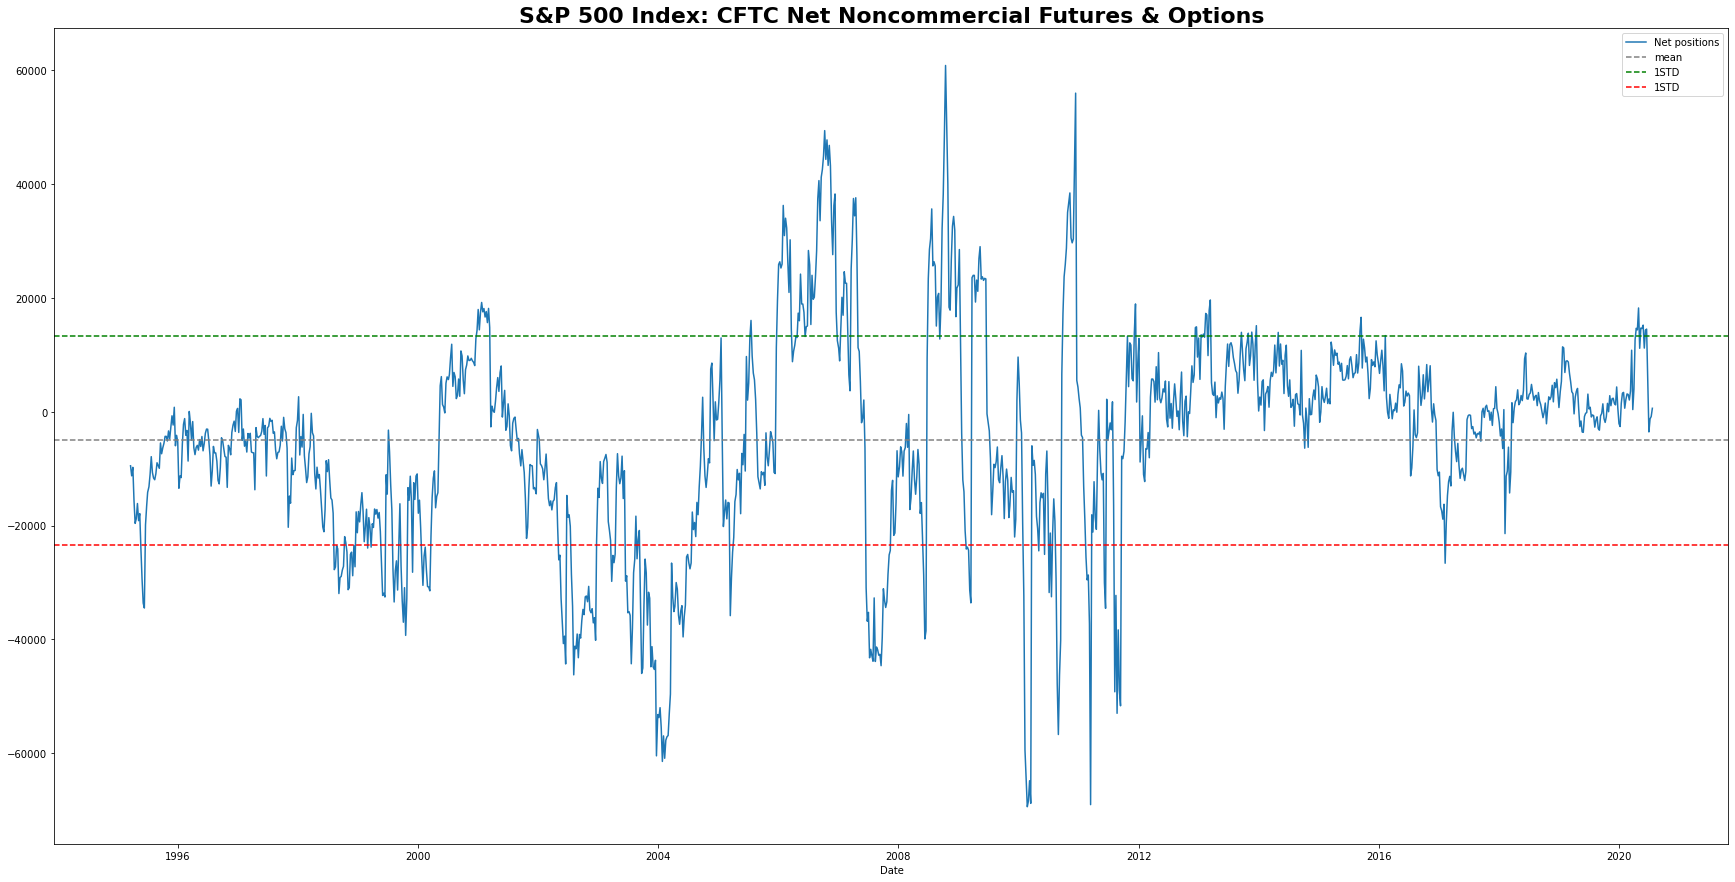

In [8]:
#Plot S&P500 CFTC data
def create_plot(data):
    x = SP500_data.index
    y = SP500_data["Net Noncommercial Futures/Options"]
    std_positive = (Average_sp500 + std_sp500)
    std_negative = (Average_sp500 - std_sp500)

    plt.subplots(figsize=(30,15))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_sp500,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"S&P 500 Index: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(SP500_data["Net Noncommercial Futures/Options"])

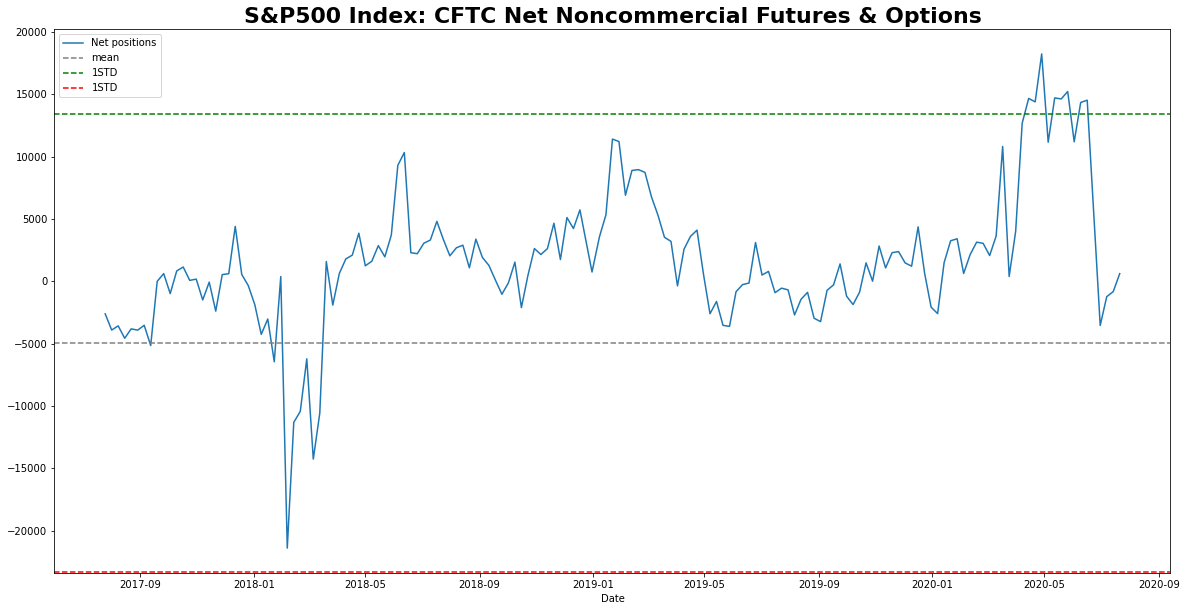

In [9]:
##Plot EUR CFTC data last 3 years
def create_plot(data):
    x = SP500_data.index[-156:]
    y = SP500_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average_sp500 + std_sp500)
    std_negative = (Average_sp500 - std_sp500)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_sp500,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"S&P500 Index: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(SP500_data["Net Noncommercial Futures/Options"][-156:])

In [10]:
def get_data(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    ticker_info = ticker_data.info
    investment_name = ticker_info['shortName']
    print(investment_name)
    
    today = datetime.datetime.today().isoformat()
    print("Today is: " + today[:10])
    
    ticker_df = ticker_data.history(period='1d', start='2019-07-15', end=today[:10])
    last_price = ticker_df["Close"].iloc[-1]
    print(ticker_df)
    print(f"{investment_name} price is: ${last_price}")
    #ticker_df["Close"].plot()
get_data('SPY')

SPDR S&P 500
Today is: 2020-07-25
              Open    High     Low   Close    Volume  Dividends  Stock Splits
Date                                                                         
2019-07-15  295.24  295.24  294.31  294.86  33900000        0.0             0
2019-07-16  294.77  294.99  293.58  293.91  36650100        0.0             0
2019-07-17  293.88  294.06  291.91  291.91  36036300        0.0             0
2019-07-18  291.37  293.39  290.89  292.98  51392600        0.0             0
2019-07-19  294.17  294.20  291.17  291.35  58678600        0.0             0
...            ...     ...     ...     ...       ...        ...           ...
2020-07-20  321.43  325.13  320.62  324.32  56308800        0.0             0
2020-07-21  326.45  326.93  323.94  325.01  57499000        0.0             0
2020-07-22  324.62  327.20  324.50  326.86  57792900        0.0             0
2020-07-23  326.47  327.23  321.48  322.96  75738000        0.0             0
2020-07-24  320.95  321.99  31

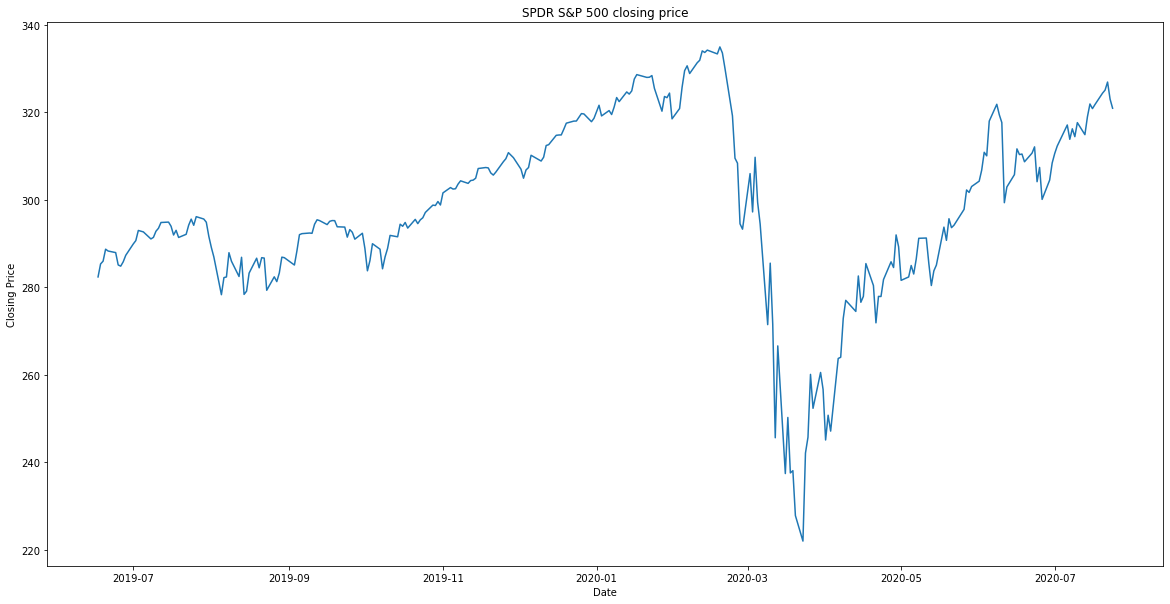

In [11]:
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2019-06-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('SPY')

In [12]:
# Download ticker data
tickers =["SPY"]
stock_data = yf.download(tickers,start="2012-01-01")

stock_data = stock_data.drop(columns=["Close", "High", "Low", "Open", "Volume"])
stock_data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,107.563774
2012-01-04,107.732529
2012-01-05,108.019356
2012-01-06,107.740929
2012-01-09,108.002480
...,...
2020-07-20,324.320007
2020-07-21,325.010010
2020-07-22,326.859985


In [13]:
# calculate daily returns
stock_returns = stock_data.pct_change()
stock_returns = stock_returns.dropna()
stock_returns

,Adj Close
Date,
2012-01-04,0.001569
2012-01-05,0.002662
2012-01-06,-0.002578
2012-01-09,0.002428
2012-01-10,0.008670
...,...
2020-07-20,0.008082
2020-07-21,0.002128
2020-07-22,0.005692


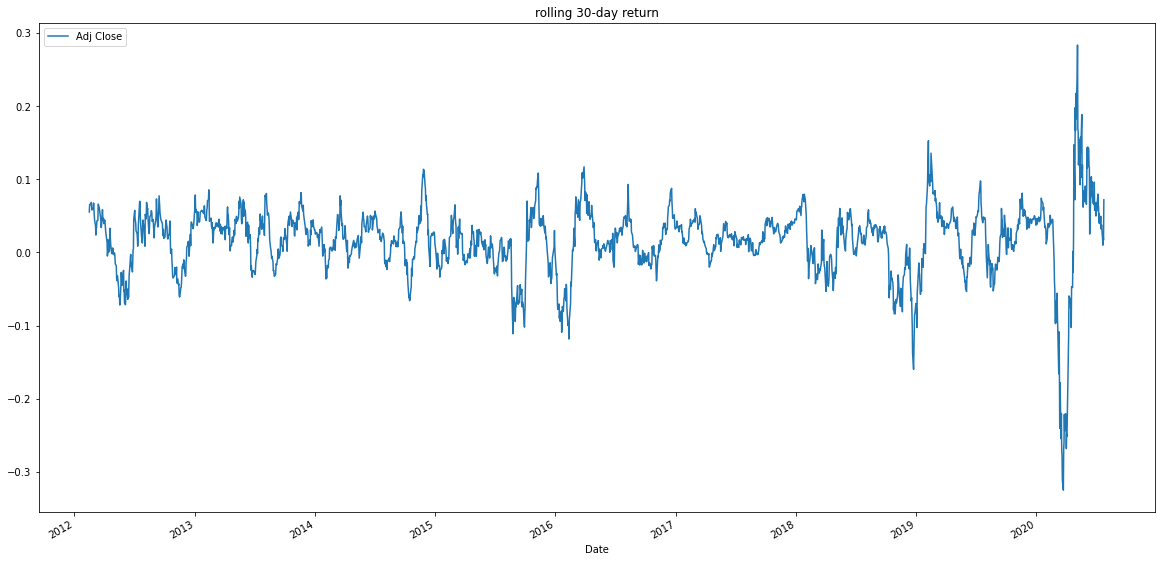

In [14]:
#calculating a rolling 30-day return
cumulative_returns_df = (stock_returns+1).rolling(30).apply(np.prod)-1

ax = cumulative_returns_df.plot(figsize=(20,10),title = "rolling 30-day return")
#ax.axis(["2015-03-03", "2019-05-01", 0.0, 0.035])

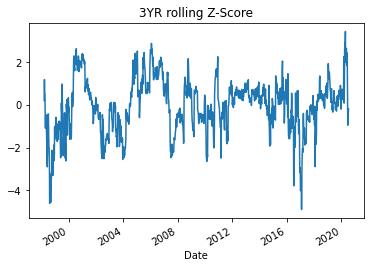

In [15]:
# z-score analysis

def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z
#z_score_historical_cbt = ((CBT_data["Net Noncommercial Futures/Options"][-1]) - Average_cbt)/std_cbt
#z_score_historical_cbt

SP500_data['Z_score_3yr'] = zscore(SP500_data.loc[:,'Net Noncommercial Futures/Options'], 52*3)
SP500_data['Z_score_3yr'].plot(title="3YR rolling Z-Score")

In [16]:
# Overbought threshold
SP500_data[SP500_data['Z_score_3yr'] > 2.8]


,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options,Z_score_3yr
Date,,,,
2006-01-31,75030.0,38764.0,36266.0,2.873096
2020-04-14,17657.0,2977.0,14680.0,2.897982
2020-04-28,20888.0,2638.0,18250.0,3.431407


In [17]:
# Show returns for time periods
special_df = cumulative_returns_df.reset_index()

print(special_df.loc[special_df["Date"] == "2020-04-14"])
print(special_df.loc[special_df["Date"] == "2020-04-28"])

           Date  Adj Close
2081 2020-04-14  -0.076454
           Date  Adj Close
2091 2020-04-28   0.198291


In [19]:
# Show returns 30 days after threshold
print(special_df.loc[2081+30])
print(special_df.loc[2091+30])


Date         2020-05-27 00:00:00
Adj Close              0.0695584
Name: 2111, dtype: object
Date         2020-06-10 00:00:00
Adj Close               0.116438
Name: 2121, dtype: object


In [33]:
# Oversold threshold
SP500_data[SP500_data['Z_score_3yr'] < -2.8]

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options,Z_score_3yr
Date,,,,
1998-06-09,24924.0,45994.0,-21070.0,-2.901361
1998-08-11,13816.0,41549.0,-27733.0,-4.614864
1998-08-18,11987.0,39249.0,-27262.0,-4.228684
1998-08-25,14894.0,38412.0,-23518.0,-3.262997
1998-09-01,14551.0,38630.0,-24079.0,-3.247596
1998-09-08,13353.0,45279.0,-31926.0,-4.565724
1998-09-15,14073.0,43185.0,-29112.0,-3.784068
1998-09-22,11008.0,39924.0,-28916.0,-3.566205
1998-09-29,10716.0,38513.0,-27797.0,-3.230597


In [70]:
# Retrieve index for each date that cross oversold threshold
special_df = cumulative_returns_df.reset_index()

print(special_df.loc[special_df["Date"] == "2016-07-12"])
print(special_df.loc[special_df["Date"] == "2016-07-19"])
print(special_df.loc[special_df["Date"] == "2016-12-20"])
print(special_df.loc[special_df["Date"] == "2016-12-27"])
print(special_df.loc[special_df["Date"] == "2017-01-03"])
print(special_df.loc[special_df["Date"] == "2017-01-10"])
print(special_df.loc[special_df["Date"] == "2017-01-17"])
print(special_df.loc[special_df["Date"] == "2017-01-24"])
print(special_df.loc[special_df["Date"] == "2017-01-31"])
print(special_df.loc[special_df["Date"] == "2017-02-07"])
print(special_df.loc[special_df["Date"] == "2017-02-14"])
print(special_df.loc[special_df["Date"] == "2018-02-06"])


           Date  Adj Close
1136 2016-07-12    0.02772
           Date  Adj Close
1141 2016-07-19    0.02822
           Date  Adj Close
1249 2016-12-20   0.068423
           Date  Adj Close
1253 2016-12-27   0.051676
           Date  Adj Close
1257 2017-01-03   0.034602
           Date  Adj Close
1262 2017-01-10   0.028326
           Date  Adj Close
1266 2017-01-17   0.036496
           Date  Adj Close
1271 2017-01-24    0.01684
           Date  Adj Close
1276 2017-01-31   0.009087
           Date  Adj Close
1281 2017-02-07   0.015796
           Date  Adj Close
1286 2017-02-14   0.045497
           Date  Adj Close
1532 2018-02-06   0.005793


In [51]:
# Show returns for 30 days after crossing oversold threshold
special_df.loc[1136+30]
special_df.loc[1141+30]
special_df.loc[1249+30]
special_df.loc[1253+30]
special_df.loc[1257+30]
special_df.loc[1262+30]
special_df.loc[1266+30]
special_df.loc[1271+30]
special_df.loc[1276+30]
special_df.loc[1281+30]
special_df.loc[1286+30]
special_df.loc[1532+30]

Date         2016-08-23 00:00:00
Adj Close              0.0187021
Name: 1166, dtype: object
Date         2016-08-30 00:00:00
Adj Close             0.00837261
Name: 1171, dtype: object
Date         2017-02-03 00:00:00
Adj Close              0.0129859
Name: 1279, dtype: object
Date         2017-02-09 00:00:00
Adj Close              0.0191362
Name: 1283, dtype: object
Date         2017-02-15 00:00:00
Adj Close              0.0429764
Name: 1287, dtype: object
Date         2017-02-23 00:00:00
Adj Close              0.0440693
Name: 1292, dtype: object
Date         2017-03-01 00:00:00
Adj Close               0.059801
Name: 1296, dtype: object
Date         2017-03-08 00:00:00
Adj Close              0.0393673
Name: 1301, dtype: object
Date         2017-03-15 00:00:00
Adj Close               0.050191
Name: 1306, dtype: object
Date         2017-03-22 00:00:00
Adj Close              0.0277768
Name: 1311, dtype: object
Date         2017-03-29 00:00:00
Adj Close              0.0122579
Name: 1316, dt

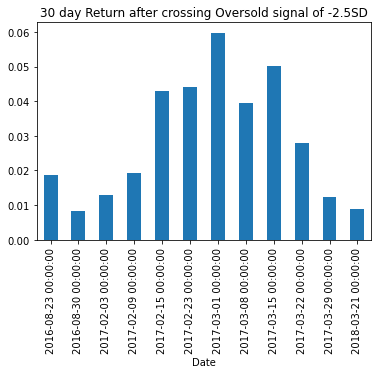

In [68]:
# Chart 30 day returns after posting -2.5SD
returns_post_oversold_threshold = special_df[special_df["Date"].isin(["2016-08-23", 
                                         "2016-08-30", 
                                         "2017-02-03",
                                         "2017-02-09", 
                                         "2017-02-15", 
                                         "2017-02-23", 
                                         "2017-03-01", 
                                         "2017-03-08", 
                                         "2017-03-15", 
                                         "2017-03-22", 
                                         "2017-03-29", 
                                         "2018-03-21"])]
ax = returns_post_oversold_threshold.plot.bar(x='Date', 
                                              y='Adj Close', 
                                              rot=90, 
                                              title= "30 day Return after crossing Oversold signal of -2.5SD", 
                                              legend = None)